# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Config info
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [2]:
print(query_url)


http://api.openweathermap.org/data/2.5/weather?appid=b62fad0a26da7e8772264ef3cb68b5a0&units=imperial&q=


## Generate Cities List

In [6]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

len(cities)

584

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:
city_name = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

x=0
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        x=x+1
        print(f"Pulling data for {x} | {city}")
        city_name.append(response["name"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        
    except KeyError: 
        print("data not found")

Pulling data for 1 | busselton
Pulling data for 2 | calbuco
Pulling data for 3 | naryan-mar
Pulling data for 4 | qaqortoq
Pulling data for 5 | cape town
Pulling data for 6 | port alfred
Pulling data for 7 | buenos aires
Pulling data for 8 | butaritari
Pulling data for 9 | barrow
Pulling data for 10 | flinders
Pulling data for 11 | portland
Pulling data for 12 | lexington park
Pulling data for 13 | hithadhoo
Pulling data for 14 | hobart
Pulling data for 15 | gunjur
Pulling data for 16 | paamiut
Pulling data for 17 | san jose de guanipa
Pulling data for 18 | jacmel
Pulling data for 19 | bambous virieux
Pulling data for 20 | matagami
Pulling data for 21 | vao
Pulling data for 22 | lucea
Pulling data for 23 | pangnirtung
Pulling data for 24 | ponta do sol
Pulling data for 25 | oriximina
Pulling data for 26 | tuktoyaktuk
Pulling data for 27 | iqaluit
Pulling data for 28 | victoria
Pulling data for 29 | bandrele
Pulling data for 30 | laguna
Pulling data for 31 | ushuaia
Pulling data for 32 |

Pulling data for 250 | manokwari
Pulling data for 251 | karamea
data not found
Pulling data for 252 | lagoa
Pulling data for 253 | asau
Pulling data for 254 | brae
Pulling data for 255 | sao filipe
Pulling data for 256 | petropavlovka
Pulling data for 257 | taburi
data not found
Pulling data for 258 | san cristobal
Pulling data for 259 | ambulu
Pulling data for 260 | maceio
Pulling data for 261 | ayan
Pulling data for 262 | noumea
Pulling data for 263 | visby
Pulling data for 264 | mitsamiouli
Pulling data for 265 | plettenberg bay
Pulling data for 266 | camargo
Pulling data for 267 | tiarei
Pulling data for 268 | srednekolymsk
Pulling data for 269 | sarangani
Pulling data for 270 | baruun-urt
Pulling data for 271 | saint-pierre
Pulling data for 272 | morondava
Pulling data for 273 | coquimbo
Pulling data for 274 | jucurutu
Pulling data for 275 | kununurra
Pulling data for 276 | kulhudhuffushi
Pulling data for 277 | vanavara
Pulling data for 278 | roma
Pulling data for 279 | souillac
P

Pulling data for 493 | nantucket
Pulling data for 494 | aflu
data not found
Pulling data for 495 | linxia
Pulling data for 496 | ystad
Pulling data for 497 | semnan
Pulling data for 498 | zarubino
Pulling data for 499 | sorvag
data not found
Pulling data for 500 | itarema
Pulling data for 501 | olafsvik
Pulling data for 502 | lincoln
Pulling data for 503 | muyezerskiy
Pulling data for 504 | la palma
Pulling data for 505 | talcahuano
Pulling data for 506 | magdagachi
Pulling data for 507 | usinsk
Pulling data for 508 | butembo
Pulling data for 509 | eureka
Pulling data for 510 | sinop
Pulling data for 511 | sakaiminato
Pulling data for 512 | maryville
Pulling data for 513 | shasta lake
Pulling data for 514 | boguchany
Pulling data for 515 | divnogorsk
Pulling data for 516 | tual
Pulling data for 517 | sao joao da barra
Pulling data for 518 | harfleur
Pulling data for 519 | shelton
Pulling data for 520 | pacifica
Pulling data for 521 | pindobacu
Pulling data for 522 | nokaneng
Pulling da

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
#Create the data frame 
export_frame = pd.DataFrame({
        "City":city_name,
        "Lat":lat,
        "Lng":lng,
        "Max Temp":max_temp,
        "Humidity":humidity,
        "Cloudiness":cloudiness,
        "Wind Speed":wind_speed,
        "Country":country,
        "Date":date 
})
#Export the data to a .csv file 
export_frame.to_csv("city_weather.csv", index = False)
#Display the data frame
export_frame

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Busselton,-33.65,115.33,60.01,70,0,11.01,AU,1603931242
1,Calbuco,-41.77,-73.13,50.31,63,97,9.04,CL,1603931242
2,Naryan-Mar,67.67,53.09,36.27,98,100,9.91,RU,1603931242
3,Qaqortoq,60.72,-46.03,31.48,94,100,5.57,GL,1603931242
4,Cape Town,-33.93,18.42,61.00,87,75,17.22,ZA,1603931042
...,...,...,...,...,...,...,...,...,...
537,Lahat,-3.80,103.53,75.07,86,97,0.83,ID,1603931343
538,Upata,8.01,-62.40,87.01,64,33,5.10,VE,1603931343
539,Mount Gambier,-37.83,140.77,50.20,95,100,6.08,AU,1603931254
540,Borovskoy,53.80,64.15,27.88,93,73,9.89,KZ,1603931343


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [ ]:
#no cities with humidity over 100%

In [9]:
#  Get the indices of cities that have humidity over 100%
df2 = export_frame.loc[export_frame["Humidity"] >= 100]
df2

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
76,Kiryat Gat,31.61,34.76,75.00,100,98,1.01,IL,1603931257
301,Luba,3.46,8.55,75.20,100,40,3.36,GQ,1603931300
436,Laas,46.62,10.70,43.00,100,76,1.88,IT,1603931325
469,Butembo,0.15,29.28,58.19,100,100,2.33,CD,1603931331


In [7]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

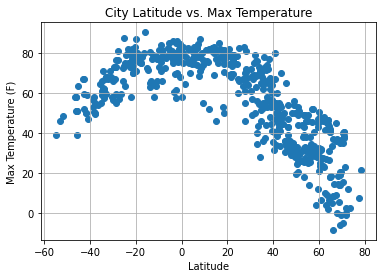

In [12]:
#Create the plot
plt.scatter(export_frame["Lat"], export_frame["Max Temp"], marker = "o")

#Labeling 
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig('scatter_plot1.png', dpi=300)

## Latitude vs. Humidity Plot

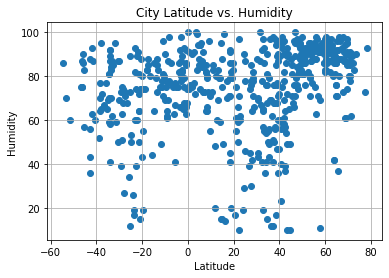

In [13]:
#Create the plot
plt.scatter(export_frame["Lat"], export_frame["Humidity"], marker = "o")

#Labeling 
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig('scatter_plot2.png', dpi=300)

## Latitude vs. Cloudiness Plot

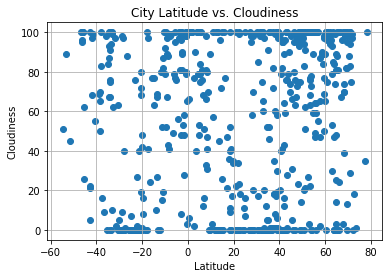

In [14]:
#Create the plot
plt.scatter(export_frame["Lat"], export_frame["Cloudiness"], marker = "o")

#Labeling 
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig('scatter_plot3.png', dpi=300)

## Latitude vs. Wind Speed Plot

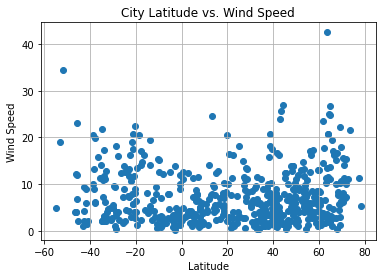

In [15]:
#Create the plot
plt.scatter(export_frame["Lat"], export_frame["Wind Speed"], marker = "o")

#Labeling 
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig('scatter_plot4.png', dpi=300)

## Linear Regression

In [16]:
northern_hemisphere = export_frame.loc[export_frame["Lat"] >= 0,:]

southern_hemisphere = export_frame.loc[export_frame["Lat"] < 0,:]
southern_hemisphere

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Busselton,-33.65,115.33,60.01,70,0,11.01,AU,1603931242
1,Calbuco,-41.77,-73.13,50.31,63,97,9.04,CL,1603931242
4,Cape Town,-33.93,18.42,61.00,87,75,17.22,ZA,1603931042
5,Port Alfred,-33.59,26.89,67.26,84,100,6.11,ZA,1603931242
6,Buenos Aires,-34.61,-58.38,59.00,81,67,1.99,AR,1603931126
...,...,...,...,...,...,...,...,...,...
527,Breves,-1.68,-50.48,79.05,79,58,3.74,BR,1603931341
532,Parkes,-33.13,148.18,68.00,62,10,1.99,AU,1603931342
534,Codrington,-38.27,141.97,57.99,70,70,8.99,AU,1603931342
537,Lahat,-3.80,103.53,75.07,86,97,0.83,ID,1603931343


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7141254856630617


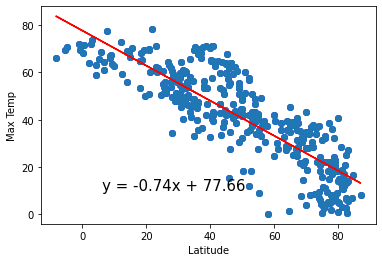

<Figure size 432x288 with 0 Axes>

In [17]:
x_values = northern_hemisphere["Max Temp"]
y_values = northern_hemisphere["Lat"]

plt.scatter(x_values,y_values,marker = "o", color='b')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15)
print(f"The r-squared is: {rvalue**2}")

plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()
plt.savefig('scatter_plot5.png', dpi=300)

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5236058819348716


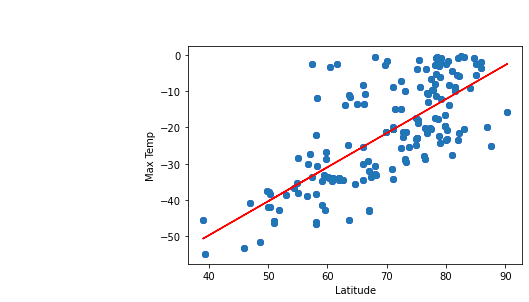

<Figure size 432x288 with 0 Axes>

In [18]:
x_values = southern_hemisphere["Max Temp"]
y_values = southern_hemisphere["Lat"]

plt.scatter(x_values,y_values,marker = "o", color='b')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15)
print(f"The r-squared is: {rvalue**2}")

plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()
plt.savefig('scatter_plot6.png', dpi=300)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.06788236147795278


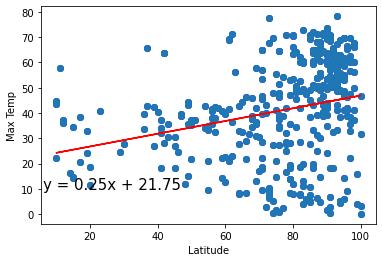

<Figure size 432x288 with 0 Axes>

In [19]:
x_values = northern_hemisphere["Humidity"]
y_values = northern_hemisphere["Lat"]

plt.scatter(x_values,y_values,marker = "o", color='b')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15)
print(f"The r-squared is: {rvalue**2}")

plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()
plt.savefig('scatter_plot7.png', dpi=300)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.012998235502396583


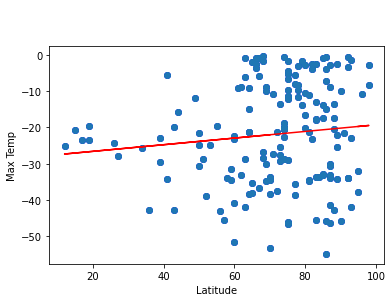

<Figure size 432x288 with 0 Axes>

In [20]:
x_values = southern_hemisphere["Humidity"]
y_values = southern_hemisphere["Lat"]

plt.scatter(x_values,y_values,marker = "o", color='b')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15)
print(f"The r-squared is: {rvalue**2}")

plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()
plt.savefig('scatter_plot8.png', dpi=300)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.04258200041152987


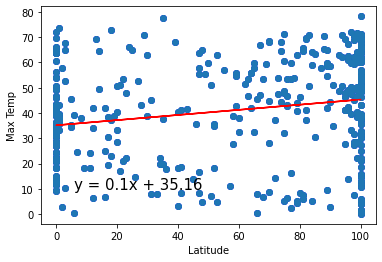

<Figure size 432x288 with 0 Axes>

In [21]:
x_values = northern_hemisphere["Cloudiness"]
y_values = northern_hemisphere["Lat"]

plt.scatter(x_values,y_values,marker = "o", color='b')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15)
print(f"The r-squared is: {rvalue**2}")

plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()
plt.savefig('scatter_plot9.png', dpi=300)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.010502703969890979


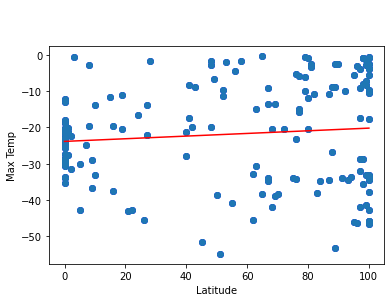

<Figure size 432x288 with 0 Axes>

In [22]:
x_values = southern_hemisphere["Cloudiness"]
y_values = southern_hemisphere["Lat"]

plt.scatter(x_values,y_values,marker = "o", color='b')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15)
print(f"The r-squared is: {rvalue**2}")

plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()
plt.savefig('scatter_plot10.png', dpi=300)

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.04620081301110566


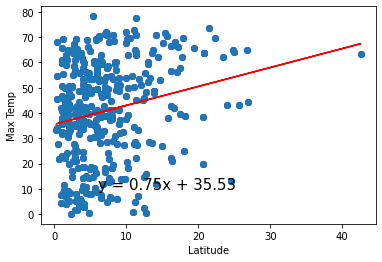

<Figure size 432x288 with 0 Axes>

In [23]:
x_values = northern_hemisphere["Wind Speed"]
y_values = northern_hemisphere["Lat"]

plt.scatter(x_values,y_values,marker = "o", color='b')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15)
print(f"The r-squared is: {rvalue**2}")

plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()
plt.savefig('scatter_plot11.png', dpi=300)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.06664269152640258


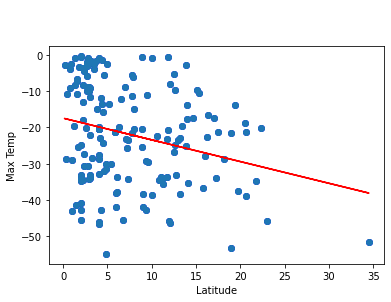

<Figure size 432x288 with 0 Axes>

In [24]:
x_values = southern_hemisphere["Wind Speed"]
y_values = southern_hemisphere["Lat"]

plt.scatter(x_values,y_values,marker = "o", color='b')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15)
print(f"The r-squared is: {rvalue**2}")

plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()
plt.savefig('scatter_plot12.png', dpi=300)